<a href="https://colab.research.google.com/github/M-A-Lopa/CSE330/blob/main/CSE330_LAB04_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAME = "Mehrin Afroz Lopa"
ID = "2299547"
SECTION = "16"

## Importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.polynomial import Polynomial

In [ ]:
P=Polynomial([1,2,3,4])

In [ ]:
print(P.deriv(1))

2.0 + 6.0·x + 12.0·x²


## Part 2: Polynomial Interpolation Using Newton's Divided Difference Form
---


### Newton's Divided Difference Form

Newton form of a $n$ degree polynomial:

$$p_n(x) = \sum_{k=0}^{n} a_kn_k(x),$$
where the basis is:
$$n_k(x) = \prod_{j=0}^{k-1}(x-x_j),$$
$$ n_0(x)=1,$$

and the coefficients are: $$a_k = f[x_0, x_1, ..., x_k],$$

where the notation $f[x_0, x_1,\dots,x_k]$ denotes the divided difference.

By expanding the Newton form, we get:

$$p(x) = f [x_0] + (x-x_0) f[x_0,x_1] + (x-x_0) (x-x_1) f[x_0,x_1,x_2] + \dots + (x-x_0) (x-x_1) \dots (x-x_{k-1}) f[x_0, x_1, \dots, x_k]$$


## Task 2 - 2 Marks:
1. Complete the `calc_div_diff(x,y)` function which takes input `x` and `y`, and calculates all the divided differences. You may use the lambda function `difference()` inside the `calc_div_diff(x,y)` function to calculate the divided differences.

2. Complete the `__call__()` function which takes an input `x`, and calculates `y` using all the difference coefficients. `x` can be a single value or a numpy. In this case, it is a numpy array.

`res` variable must contain all results (corresponding y for x).

In [ ]:
# basic rule for calculating the difference, implanted in the lambda function.
# You may use it if you wish
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)
def calc_div_diff(x,y):
    assert(len(x)==len(y))#used instead of if else condition
    #returns boolean val
    #if cond matches, returns true otherwise False

    #write this function to calculate all the divided differences in the list 'b'
    #b = []
    #----------------------------------------------
    #write your code

    n = len(x)
    coef = np.zeros((n,n))  #initializing
    #----------------------------------------------
    coef[:,0] = y   #accessing 1st col
    #coeff[0] ---- to access the first row

    for j in range(1,n): #Col = 1
      for i in range(n-j): #Row = 3-1 = 2-->i = 0, 1
        #when col = 2 --> row = 3-2 = 1, i = 0
        #joto col agabo, toto row kombe
        coef[i][j] = (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i])#coef[0][1] = (coef[1][0] - coef[0][0]) / x[1]-x[0]
        #coef[i+1][j-1] --> coef[i+1] --> porer row, coeff[j-1] __> ager col e stored val
    #----------------------------------------------
    #raise NotImplementedError()
    return coef[0] #for 1st row

In [ ]:
data_x = [-3.,-2.,-1.,0.,1.,3.,4.]
data_y = [-60.,-80.,6.,1.,45.,30.,16.]

test = calc_div_diff(data_x, data_y)

assert len(test) == len(data_x)

In [ ]:
np.testing.assert_array_equal([-60.0,-20.0,53.0,-32.833333333333336,14.041666666666668,-3.465277777777778,0.7232142857142857], test)

In [ ]:
class Newtons_Divided_Differences:

    def __init__(self, differences, data_x):
        self.differences = differences
        self.data_x = data_x

    def __call__(self, x):#test_y = p(test_x), here, text_x == x
        '''
        this function is for calculating y from given x using all the difference coefficients
        x can be a single value or a numpy
        the formula being used:
        f(x) = f [x0] + (x-x0) f[x0,x1] + (x-x0) (x-x1) f[x0,x1,x2] + . . . + (x-x0) (x-x1) . . . (x-xk-1) f[x0, x1, . . ., xk]

        work on this after implementing 'calc_div_diff'. Then you should have
        f[x0], f[x0,x1]. . . . . ., f[x0, x1, . . ., xk] stored in self.differences

        'res' variable must return all the results (corresponding y for x)
        '''

        res = np.zeros(len(x)) #Initialization to avoid runtime error. You can change this line if you wish

        #----------------------------------------------
        # YOUR CODE

        for i in range(len(self.differences)):
          result = 1
          for j in range(i):
            result*= (x - self.data_x[j])#x is a NumPy array.
            #x - self.data_x[j] results in a vector:[x0 - xj, x1 - xj, x2 - xj, ..., xn - xj]
            #if dont want to write X --> take outer loop(k) and x[k] - self.data_x[j]
          res+= result * self.differences[i]
          #result becomes a vector (numpy array).
          #result * self.differences[i] → also a vector.
          #res += vector → vector addition happens automatically (element-wise)!
          #The whole res array is updated in one shot using vectorized operations!
          #thus res was written instead of res[]
        #----------------------------------------------

        return res

### Plotting the polynomial
* `data_x` and `data_y` are the coordinates of the given nodes.

* `differences` is a list which contains the divided differences as each of its elements: $f[x_0], f[x_0,x_1], f[x_0,x_1,x_2], \dots$

* `obj` is an object of type `Newtons_Divided_Differences`. Creating the object runs the constructor of the class where the `difference` are stored in `self.differences`.

* `X` contains $x_i$ values through which we want to plot our polynomial.

* Calling the object using `obj(X)` executes the `__call__()` function of the class, which returns a numpy array containing the corresponding $y_i$ values, and storing them in variable `F`.

* Using `plt.plot(X,F)`, we plot the $(x_i, y_i)$ pairs of the polynomial.

[-7.         -6.65306122 -6.30612245 -5.95918367 -5.6122449  -5.26530612
 -4.91836735 -4.57142857 -4.2244898  -3.87755102 -3.53061224 -3.18367347
 -2.83673469 -2.48979592 -2.14285714 -1.79591837 -1.44897959 -1.10204082
 -0.75510204 -0.40816327 -0.06122449  0.28571429  0.63265306  0.97959184
  1.32653061  1.67346939  2.02040816  2.36734694  2.71428571  3.06122449
  3.40816327  3.75510204  4.10204082  4.44897959  4.79591837  5.14285714
  5.48979592  5.83673469  6.18367347  6.53061224  6.87755102  7.2244898
  7.57142857  7.91836735  8.26530612  8.6122449   8.95918367  9.30612245
  9.65306122 10.        ]


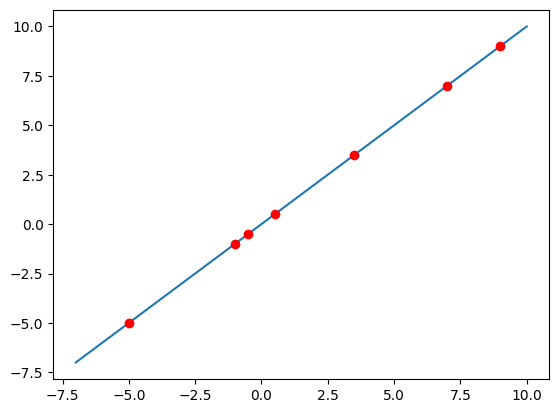

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
data_y = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)#obj created
test_x = np.linspace(-7, 10, 50, endpoint=True)
test_y = p(test_x)#when we call an obj, it calls the __call__ function
#text_x is __call__ func's x
print(test_y)
plt.plot(test_x, test_y)
plt.plot(data_x, data_y, 'ro')
plt.show()

# Daily Evaluation - 4 marks

For part 2 and 3 question: Suppose the given original function is sin(x) and f(x) = sin(x). Now, the given nodes are -pi/2, 0 , pi/2. Calculate the value of the interppolating polynomial at x = pi/4 and show the truncation error. To get the value of pi you can import the math library and just type math.pi. To give values of sin(x) function at any given point of x,just type math.sin(x)

In [ ]:
import math
data_x = np.array([-math.pi/2, 0, math.pi/2])
data_y = np.array([math.sin(-(math.pi/2)), math.sin(0), math.sin(math.pi/2)])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
test_x = np.array([math.pi/4])#ekta value pass korteci so ekta value ashbe
#multiple value send korle 1d array te prottek value er jonno
test_y = p(test_x)
print("Value of interpolating polynomial:",test_y[0])

truncation_error = abs(math.sin(math.pi/4) - test_y[0])
print()
print("Truncation error:", truncation_error)

Value of interpolating polynomial: 0.5

Truncation error: 0.20710678118654746


In [ ]:
import numpy as np

data_x = np.array([-np.pi/2, 0, np.pi/2])
data_y = np.array([np.sin(-(np.pi/2)), np.sin(0), np.sin(np.pi/2)])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
test_x = np.array([np.pi/4])
test_y = p(test_x)
print("Value of interpolating polynomial:",test_y[0])

truncation_error = abs(np.sin(np.pi/4) - test_y[0])
print()
print("Truncation error:", truncation_error)

Value of interpolating polynomial: 0.5

Truncation error: 0.20710678118654746


In [ ]:
#simulation for loop inside the __call__()
#test_x = [0.785, 0.393] --> x --> passed inside __call__()

#data_x = [-1.571, 0.0, 1.571] --> x0, x1, x2

#j = 0: temp1 = test_x - x_0 = [2.356, 1.964]

#j = 1: temp2 = test_x - x_1 = [0.785, 0.393]

#result = temp1 * temp2 = [2.356*0.785, 1.964*0.393] ≈ [1.85, 0.77]